# Quick start

In [1]:
import xbitinfo as xb

import xarray as xr

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2023-05-01T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-05-09 21:24:32 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

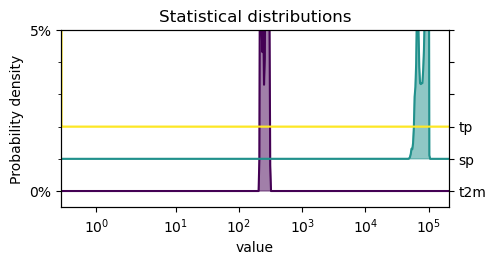

In [2]:
ds = xr.open_dataset('data/data.nc')

xb.plot_distribution(ds)
ds

## Get information content per bit

using {py:func}`xbitinfo.xbitinfo.get_bitinformation`

In [3]:
info_per_bit = xb.get_bitinformation(ds, dim="longitude", implementation="python")

info_per_bit

  0%|          | 0/3 [00:00<?, ?it/s]

/home/ayoubf/miniconda3/envs/bitinfo/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/ayoubf/miniconda3/envs/bitinfo/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/home/ayoubf/miniconda3/envs/bitinfo/lib/python3.11/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))


<xarray.Dataset>
Dimensions:  (bit32: 32)
Coordinates:
  * bit32    (bit32) <U3 '±' 'e1' 'e2' 'e3' 'e4' ... 'm20' 'm21' 'm22' 'm23'
    dim      <U9 'longitude'
Data variables:
    t2m      (bit32) float64 0.0 0.8829 0.0 0.0 ... 0.0902 0.09287 0.06952
    sp       (bit32) float64 0.0 0.8829 0.0 0.0 ... 0.09305 0.0929 0.05539
    tp       (bit32) float64 0.0 0.0 0.0 0.0 ... 0.01014 0.003797 0.0006136
Attributes:
    xbitinfo_description:       bitinformation calculated by xbitinfo.get_bit...
    python_repository:          https://github.com/observingClouds/xbitinfo
    julia_repository:           https://github.com/milankl/BitInformation.jl
    reference_paper:            http://www.nature.com/articles/s43588-021-001...
    xbitinfo_version:           0.0.4.dev128+gc917b43
    BitInformation.jl_version:  0.6

## Visualize information content
using {py:func}`xbitinfo.graphics.plot_bitinformation`

/home/ayoubf/Projects/xbitinfo/xbitinfo/graphics.py:325: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


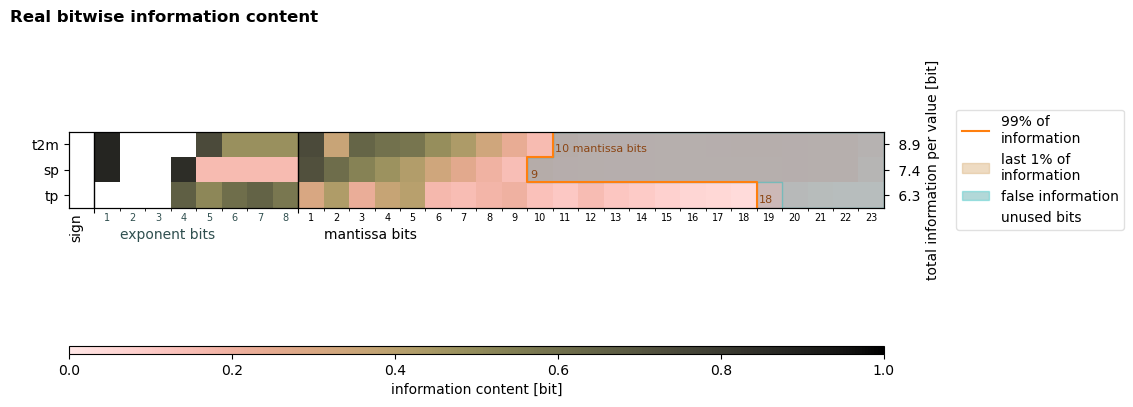

In [4]:
fig = xb.plot_bitinformation(info_per_bit)

## Get keepbits

using {py:func}`xbitinfo.xbitinfo.get_keepbits`

In [5]:
keepbits = xb.get_keepbits(info_per_bit, 0.99)
keepbits

<xarray.Dataset>
Dimensions:   (inflevel: 1)
Coordinates:
    dim       <U9 'longitude'
  * inflevel  (inflevel) float64 0.99
Data variables:
    t2m       (inflevel) int64 10
    sp        (inflevel) int64 9
    tp        (inflevel) int64 18

## Apply bitrounding

using {py:func}`xbitinfo.bitround.xr_bitround` or {py:func}`xbitinfo.bitround.jl_bitround` (does not work for chunked data)

In [6]:
ds_bitrounded = xb.xr_bitround(ds, keepbits)

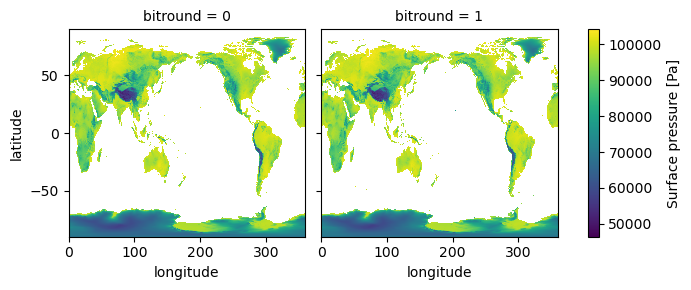

In [7]:
xr.concat([ds, ds_bitrounded], "bitround").isel(time=0)["sp"].plot(
    col="bitround"#, row="month"
)

## Save compressed

using {py:class}`xbitinfo.save_compressed.ToCompressed_Netcdf` or  {py:class}`xbitinfo.save_compressed.ToCompressed_Zarr`

### NetCDF

In [8]:
ds_bitrounded.to_compressed_netcdf("bitrounded_compressed.nc")

In [9]:
ds.to_compressed_netcdf("compressed.nc")

In [10]:
ds.to_netcdf("original.nc")

In [11]:
!du -hs *.nc

4.8M	bitrounded_compressed.nc
3.6M	compressed.nc
38M	original.nc


In [12]:
!rm *.nc

### Zarr

In [13]:
ds_bitrounded.to_compressed_zarr("bitrounded_compressed.zarr", mode="w")
ds.to_compressed_zarr("compressed.zarr", mode="w")
ds.to_zarr(
    "original.zarr", mode="w", encoding={v: {"compressor": None} for v in ds.data_vars}
);

In [14]:
!du -hs *.zarr

6.0M	bitrounded_compressed.zarr
14M	compressed.zarr
75M	original.zarr


In [15]:
!rm -r *.zarr